# Isolation Forest na Breast Cancer Wisconsin Dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer

## Wczytanie danych

In [66]:
data = load_breast_cancer()

# Rozdzielenie danych na cechy i etykiety
x = data.data          # cechy (30 wymiarów)
y = data.target        # etykiety: 0 = malignant, 1 = benign

feature_names = data.feature_names

print(data.target_names)  # ['malignant' 'benign'] - ['złośliwy' 'łagodny']
print(x.shape)        # (569, 30)
print(y.shape)        # (569,)

['malignant' 'benign']
(569, 30)
(569,)


## Parametry Isolation Forest

In [72]:
iso = IsolationForest(
    n_estimators = 20,          # liczba drzew
    contamination = 0.15,       # zakładany odsetek anomalii
    random_state = 20
)
y_pred = iso.fit_predict(x)     # isolation forest na danych x
anomalies = (y_pred == -1)

## Wyniki

In [73]:
total_anomalies = anomalies.sum()
malignant_as_anomaly = (anomalies & (y == 0)).sum()
benign_as_anomaly = (anomalies & (y == 1)).sum()

print(f"Liczba wszystkich próbek: {len(y)}")
print(f"Liczba złośliwych guzów w danych: {(y==0).sum()}")
print(f"Liczba punktów uznanych za anomalie: {total_anomalies}")
print(f" - złośliwe guzy jako anomalie: {malignant_as_anomaly}")
print(f" - łagodne guzy jako anomalie: {benign_as_anomaly}")

print(f"\nProcent guzów złośliwych uznanych za anomalie: "
      f"{malignant_as_anomaly / (y==0).sum() * 100:.2f}%")
print(f"Procent guzów łagodnych uznanych za anomalie: "
      f"{benign_as_anomaly / (y==1).sum() * 100:.2f}%")


Liczba wszystkich próbek: 569
Liczba złośliwych guzów w danych: 212
Liczba punktów uznanych za anomalie: 86
 - złośliwe guzy jako anomalie: 69
 - łagodne guzy jako anomalie: 17

Procent guzów złośliwych uznanych za anomalie: 32.55%
Procent guzów łagodnych uznanych za anomalie: 4.76%


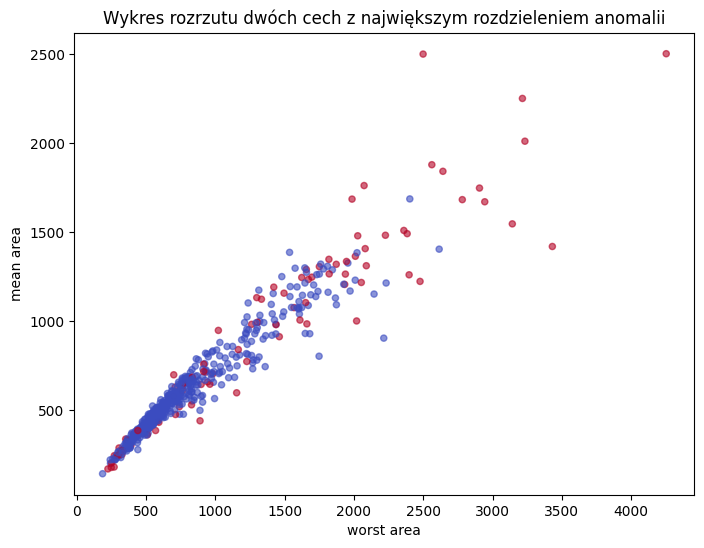

In [74]:
separation = []
for i in range(x.shape[1]):
    mean_norm = x[~anomalies, i].mean()
    mean_anom = x[anomalies, i].mean()
    separation.append(abs(mean_norm - mean_anom))

separation = pd.Series(separation, index=feature_names).sort_values(ascending=False)

top2_features = separation.index[:2]
plt.figure(figsize=(8,6))
plt.scatter(x[:, feature_names==top2_features[0]], x[:, feature_names==top2_features[1]], 
            c=anomalies, cmap="coolwarm", s=20, alpha=0.6)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("Wykres rozrzutu dwóch cech z największym rozdzieleniem anomalii")
plt.show()